In [1]:
# The reference of the code below is hw5 programming assignment
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('data_drop_null.csv')
df1 = df.to_numpy()
X = df1[:,:-1]
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)
Y = df1[:,-1:].reshape(X.shape[0],)
weight_results = []
acc_train_results = []
acc_test_results = []

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [4]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE()
# X_smote, Y_smote = smote.fit_resample(X_train,Y_train)
# X_train, Y_train = X_smote, Y_smote

In [5]:
# lamb = [i/1000 for i in range(1,10000,10)]
lamb = [0.001,0.01,0.1,1,10,100]
cVals = [1/i for i in lamb]

In [6]:
def plot_acc(acc_train, acc_test, lamb):
    labels = ['0.001', '0.01', '0.1', '1', '10', '100']
    x = np.arange(len(labels))
    width = 0.35
    fig, ax = plt.subplots()
    train_bar = ax.bar(x - width/2, acc_train, width, label='training',color = '#85C1E9')
    test_bar = ax.bar(x + width/2, acc_test, width, label='testing', color = '#F5B7B1')
    ax.set_ylabel('Accuracy')
    ax.set_xlabel('Lambda')
    ax.set_title('Accuracy vs lambda')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    train_bar[acc_train.index(max(acc_train))].set_color('#2874A6')
    test_bar[acc_test.index(max(acc_test))].set_color('#B03A2E')
    print("training max accuracy:", max(acc_train))
    print("test max accuracy:", max(acc_test))
    plt.show()

In [7]:
def plot_weight(acc_test, weight):
    max_acc = max(acc_test)
    index = acc_test.index(max_acc)
    print(max_acc, lamb[index])
    weight[index]
    plt.bar([i for i in range(len(weight[0]))],weight[index])
    plt.title("Weight of features")

In [8]:
from sklearn import svm
def svm_linear(c):
    svc_linear = svm.SVC(probability = False, kernel = 'linear', C = c, class_weight = 'balanced')
    svc_linear.fit(X_train, Y_train)

    Yhat_svc_linear_train = svc_linear.predict(X_train)
    acc_train = svc_linear.score(X_train, Y_train)
    
    acc_train_svm_linear.append(acc_train)
    
    Yhat_svc_linear_test = svc_linear.predict(X_test)
    acc_test = svc_linear.score(X_test, Y_test)

    acc_test_svm_linear.append(acc_test)
    weight_svm_linear.append(np.append(svc_linear.coef_[0],svc_linear.intercept_[0]))

In [9]:
acc_train_svm_linear = []
acc_test_svm_linear = []
weight_svm_linear = []
intercept_svm_linear = []
for c in cVals:
    svm_linear(c)
weight_results.extend(weight_svm_linear)
acc_train_results.append(acc_train_svm_linear)
acc_test_results.append(acc_test_svm_linear)

0.8034662045060659 0.001


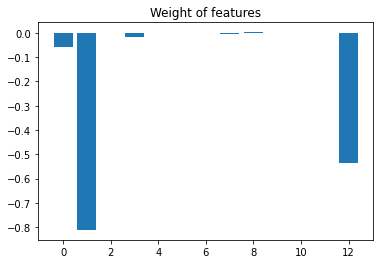

In [10]:
plot_weight(acc_test_svm_linear, weight_svm_linear)

training max accuracy: 0.799702823179792
test max accuracy: 0.8034662045060659


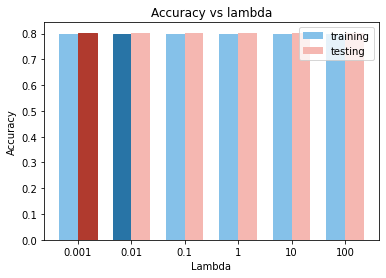

In [11]:
plot_acc(acc_train_svm_linear, acc_test_svm_linear, lamb)

In [12]:
def svm_rbf(c):
    svc_rbf = svm.SVC(probability = False, kernel = 'rbf', C = c, class_weight = 'balanced')
    svc_rbf.fit(X_train, Y_train)
   
    Yhat_svc_rbf_train = svc_rbf.predict(X_train)
    acc_train = svc_rbf.score(X_train, Y_train)
    
    acc_train_svm_rbf.append(acc_train)
    Yhat_svc_rbf_test = svc_rbf.predict(X_test)
    acc_test = svc_rbf.score(X_test, Y_test)
    
    acc_test_svm_rbf.append(acc_test)

In [13]:
acc_train_svm_rbf = []
acc_test_svm_rbf = []
for c in cVals:
    svm_rbf(c)
acc_train_results.append(acc_train_svm_rbf)
acc_test_results.append(acc_test_svm_rbf)

In [14]:
max_acc = max(acc_test_svm_rbf)
index = acc_test_svm_rbf.index(max_acc)
print(max_acc, lamb[index])

0.8329289428076256 10


training max accuracy: 0.9267459138187222
test max accuracy: 0.8329289428076256


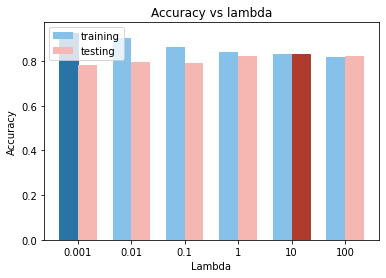

In [15]:
plot_acc(acc_train_svm_rbf, acc_test_svm_rbf, lamb)

In [16]:
def svm_polynomial(c):
    svc_polynomial = svm.SVC(probability = False, kernel = 'poly', C = c, class_weight = 'balanced')
    svc_polynomial.fit(X_train,Y_train)
    Yhat_svc_poly_train = svc_polynomial.predict(X_train)
    acc_train = svc_polynomial.score(X_train,Y_train)
    acc_train_svm_poly.append(acc_train)
    Yhat_svc_poly_test = svc_polynomial.predict(X_test)
    acc_test = svc_polynomial.score(X_test,Y_test)
    acc_test_svm_poly.append(acc_test)

In [17]:
acc_train_svm_poly = []
acc_test_svm_poly = []
for c in cVals:
    svm_polynomial(c)
acc_train_results.append(acc_train_svm_poly)
acc_test_results.append(acc_test_svm_poly)

In [18]:
max_acc = max(acc_test_svm_poly)
index = acc_test_svm_poly.index(max_acc)
print(max_acc, lamb[index])

0.8467937608318891 100


training max accuracy: 0.8433878157503715
test max accuracy: 0.8467937608318891


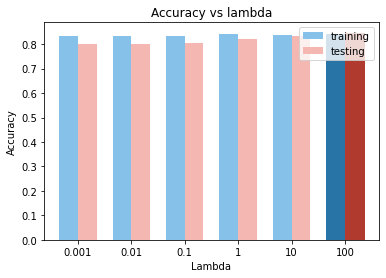

In [19]:
plot_acc(acc_train_svm_poly, acc_test_svm_poly, lamb)

In [20]:
def svm_linear(c,penalty):
    svm_linear = svm.LinearSVC(penalty=penalty,C = c, max_iter=4000,dual=False, class_weight='balanced')
    svm_linear.fit(X_train, Y_train)
    acc_train = svm_linear.score(X_train, Y_train)
    acc_train_svm_linear.append(acc_train)
    acc_test = svm_linear.score(X_test, Y_test)
    acc_test_svm_linear.append(acc_test)
    weight_svm_linear.append(np.append( svm_linear.coef_[0], svm_linear.intercept_[0]))

In [21]:
acc_train_svm_linear = []
acc_test_svm_linear = []
weight_svm_linear = []
intercept_svm_linear = []
for c in cVals:
    svm_linear(c,"l1")
weight_results.extend(weight_svm_linear)
acc_train_results.append(acc_train_svm_linear)
acc_test_results.append(acc_test_svm_linear)

0.7844020797227036 0.001


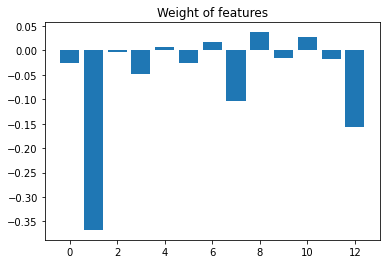

In [22]:
plot_weight(acc_test_svm_linear, weight_svm_linear)

training max accuracy: 0.7832095096582466
test max accuracy: 0.7844020797227036


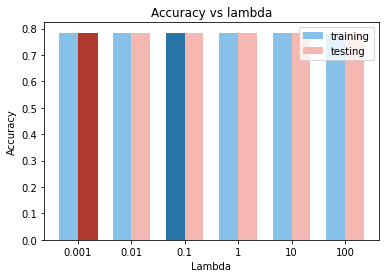

In [23]:
plot_acc(acc_train_svm_linear, acc_test_svm_linear, lamb)

In [24]:
acc_train_svm_linear = []
acc_test_svm_linear = []
weight_svm_linear = []
intercept_svm_linear = []
for c in cVals:
    svm_linear(c,"l2")
weight_results.extend(weight_svm_linear)
acc_train_results.append(acc_train_svm_linear)
acc_test_results.append(acc_test_svm_linear)

0.7844020797227036 0.001


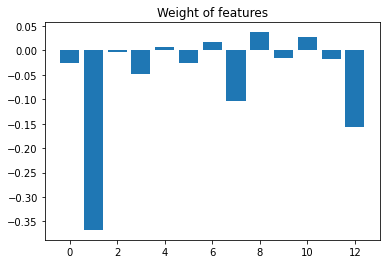

In [25]:
plot_weight(acc_test_svm_linear, weight_svm_linear)

training max accuracy: 0.7830609212481426
test max accuracy: 0.7844020797227036


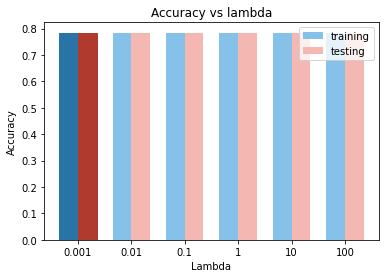

In [26]:
plot_acc(acc_train_svm_linear, acc_test_svm_linear, lamb)

In [42]:
df_weight = pd.DataFrame(weight_results, columns = df.columns.to_list()[:-1]+['intercept'], index=['svm_linear(svc), lambda=0.001','svm_linear(svc), lambda=0.01','svm_linear(svc), lambda=0.1','svm_linear(svc), lambda=1','svm_linear(svc), lambda=10','svm_linear(svc), lambda=100','svm_linear(lasso), lambda=0.001','svm_linear(lasso), lambda=0.01','svm_linear(lasso), lambda=0.1','svm_linear(lasso), lambda=1','svm_linear(lasso), lambda=10','svm_linear(lasso), lambda=100','svm_linear(ridge), lambda=0.001','svm_linear(ridge), lambda=0.01','svm_linear(ridge), lambda=0.1','svm_linear(ridge), lambda=1','svm_linear(ridge), lambda=10','svm_linear(ridge), lambda=100'])
df_weight.to_csv('weight_svm.csv')

In [39]:
df_train = pd.DataFrame(np.array(acc_train_results).T, index = lamb, columns=['svm_linear(svc)','svm_rbf(svc)','svm_poly(svc)','svm_linear(lasso)','svm_linear(ridge)'])
df_train.to_csv('acc_train_svm.csv')

In [41]:
df_test = pd.DataFrame(np.array(acc_test_results).T, index = lamb, columns=['svm_linear(svc)','svm_rbf(svc)','svm_poly(svc)','svm_linear(lasso)','svm_linear(ridge)'])
df_test.to_csv('acc_test_svm.csv')